# Hidrologi Lanjut
Extract data dari GSMAP

`uma edit`

In [1]:
# Reads GSMAP netcdf file by H. Kardhana
# uma-edit, dari fadli 20180213
# kuliah 20180213
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf as net
from datetime import datetime, timedelta
%matplotlib inline

# Fungsi/Prosedur


def pbukafilecdf():
    global rain, xdef, ydef, origin, torigin
    f = net.netcdf_file('jabar_gsmap_1hr.nc', mode='r', mmap=False)
    rain = f.variables['precip']
    xdef = 48
    ydef = 32
    origin = np.array([104.45, -8.05])  # titik awal grid
    torigin = datetime(2000, 3, 1, 0)  # awal pencatatan gsmap
    f.close()


def fwaktukejadian(awal, akhir):
    # Waktu origin + waktu awal
    waktuawal = torigin + timedelta(1, (awal+7)*3600)
    # Waktu origin + waktu akhir
    waktuakhir = torigin + timedelta(1, (akhir+7)*3600)
    # Waktu awal dan akhir, dalam bentuk list
    hasil = [waktuawal, waktuakhir]
    return hasil


# Fungsi pengubah tanggal dalam bentuk jam-jaman.
def hitungwaktu(year, month, date, hour):
    time = datetime(year, month, date, hour) - torigin
    time = timedelta.total_seconds(time)
    time = int(time/3600)
    return time


def aturkoordinat(ll, ur):
    global lowerleft, upperright
    lowerleft = np.array(ll)
    upperright = np.array(ur)
    #lowerleft = np.array(lowerleft)
    #upperright = np.array(upperright)


def ambilkoordinat():
    global x1, x2, y1, y2
    arrdim1 = (upperright-origin)/0.1
    arrdim2 = (lowerleft-origin)/0.1
    x1 = int(round(arrdim2[0]))
    x2 = int(round(arrdim1[0]))+1
    y1 = int(ydef-round(arrdim1[1]))
    y2 = int(ydef-round(arrdim2[1]))+1


def cetakgambar(i, awal, akhir, setplot='b-'):
    global absis, ordinat
    absis = []
    ordinat = []
    for k in range(awal, akhir):
        a = rain[k, y1:y2, x1:x2]
        a[a < 0] = np.nan
        b = np.mean(a)
        absis.append(k)
        ordinat.append(b)
    plt.figure(i)
    plt.plot(absis, ordinat, setplot)

In [2]:
pbukafilecdf()
# Masukkan koordinat dalam format (lower-left, upper-right) dan dalam (longitude, latitude)
aturkoordinat([107.55, -7.25], [107.75, -7.05])
ambilkoordinat()

tinit = hitungwaktu(2000, 12, 30, 21)                      # Waktu Initial
tend = hitungwaktu(2013, 12, 31, 21)                       # Waktu Akhir

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in less


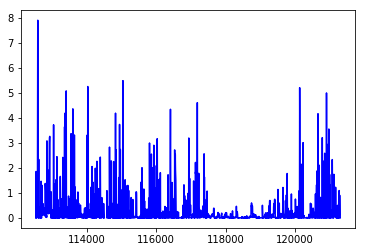

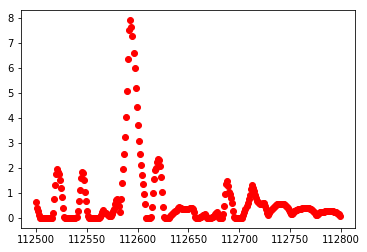

In [6]:
cetakgambar(0, hitungwaktu(2013, 1, 1, 0), hitungwaktu(2013, 12, 31, 23))
# cetakgambar(1, hitungwaktu(2012, 1, 1, 0), hitungwaktu(2012, 12, 31, 23))
cetakgambar(2, 112500, 112800, 'ro')

In [4]:
# Durasi Kejadian
a, b = 85225, 85250

# Cetak durasi kejadian
arrkejadian = fwaktukejadian(a, b)
print("Kejadian dimulai", arrkejadian[0], "sampai dengan", arrkejadian[1])

# Cetak jumlah hujan yang terjadi pada daerah das tersebut
valjumlahhujan = np.sum(ordinat)
print("Jumlah Hujan = ", valjumlahhujan, "mm/jam")

Kejadian dimulai 2009-11-21 08:00:00 sampai dengan 2009-11-22 09:00:00
Jumlah Hujan =  201.90222 mm/jam
